> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation.

# Project: Investigate a Dataset: 'tmdb-movies', Based on some movies popularity

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: The dataset about movies production is analysed in this work. The dataset is a .csv file with more than 10000 samples and 21 columns. It is mainly about the production of movies, polularity, and revenue. 

Two dependent variables are explored against several independent variable separately. 
1. The first dependent variable was the number of movies, which was not explicitely stated in the dataset. It was explored against the years of release, the directors, and the genres.
2. The second was 'revenue', which was explored against popularity, budget, directorship, and the year of release.
3. Several plots are presented for visualisations

In [89]:
# import the relevant libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [90]:
# import the dataset and view the first 5 samples

df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [91]:
# obtain the size of the dataset
df.shape

(10866, 21)

In [92]:
# insight into the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [93]:
# did some directors administered more than 1 movie?
df['director'].value_counts()

Woody Allen                 45
Clint Eastwood              34
Martin Scorsese             29
Steven Spielberg            29
Ridley Scott                23
                            ..
Jeffrey Porter               1
Larry Shaw                   1
Bill Pohlad                  1
Andy Hamilton|Guy Jenkin     1
Harold P. Warren             1
Name: director, Length: 5067, dtype: int64

<a id='wrangling'></a>
## Data Wrangling
- Here, I cleaned the dataset and prepared it for analysis
- I did the following
 - Change datatypes to provide a seamless flow of analysis, e.g., date to datetime, etc.
 - Specified the index columns
 - Remove duplicates
 - Remove rows with missing values
 - Remove irrelevant columns

In [94]:
# check stats of the dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [95]:
# the 'id' and 'release_year' should not be included in mathematical computations
df['id'] = df['id'].astype('str')
df['release_year'] = df['release_year'].astype('str')

In [96]:
# confirm the changes
df.dtypes

id                       object
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year             object
budget_adj              float64
revenue_adj             float64
dtype: object

In [97]:
# save the current dataset for future use
df.to_csv('moviedata.csv', index = False)

In [98]:
# load the new dataset
df = pd.read_csv('moviedata.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [99]:
# Both 'id' and 'imdb_id' are indexes
df = pd.read_csv('moviedata.csv', index_col = ['id', 'imdb_id'])
df.head()

,,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,imdb_id,,,,,,,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [100]:
# drop irrevalent columns not useful for my analysis
df.drop(columns = ['homepage', 'cast', 'overview', 'original_title', 'tagline',
                   'production_companies', 'keywords'], inplace = True)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10866 entries, (135397, 'tt0369610') to (22293, 'tt0060666')
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    10866 non-null  float64
 1   budget        10866 non-null  int64  
 2   revenue       10866 non-null  int64  
 3   director      10822 non-null  object 
 4   runtime       10866 non-null  int64  
 5   genres        10843 non-null  object 
 6   release_date  10866 non-null  object 
 7   vote_count    10866 non-null  int64  
 8   vote_average  10866 non-null  float64
 9   release_year  10866 non-null  int64  
 10  budget_adj    10866 non-null  float64
 11  revenue_adj   10866 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1.7+ MB


In [102]:
df['release_year'] = df['release_year'].astype('str')

In [103]:
# check for null values
df.isnull().sum()

popularity       0
budget           0
revenue          0
director        44
runtime          0
genres          23
release_date     0
vote_count       0
vote_average     0
release_year     0
budget_adj       0
revenue_adj      0
dtype: int64

In [104]:
# drop null values
df.dropna(inplace = True)

In [105]:
# confirm that all null values are gone
df.isnull().sum()

popularity      0
budget          0
revenue         0
director        0
runtime         0
genres          0
release_date    0
vote_count      0
vote_average    0
release_year    0
budget_adj      0
revenue_adj     0
dtype: int64

In [106]:
# number of duplicates
sum(df.duplicated())

1

In [107]:
# drop duplicates
df.drop_duplicates(inplace = True)

In [108]:
# confirm the the absence of duplicated
sum(df.duplicated())

0

In [109]:
# save current the current dataset for future use
df.to_csv('moviedata_02.csv', index = False)

In [110]:
df = pd.read_csv('moviedata_02.csv')
df.head()

,popularity,budget,revenue,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [111]:
# check the data type of the 'release_data'
df.release_date.dtype

dtype('O')

In [112]:
# change the 'release_date' to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

In [113]:
# confirm the date changes
df.release_date.dtype

dtype('<M8[ns]')

Read more about this dtype [here](https://stackoverflow.com/questions/29206612/difference-between-data-type-datetime64ns-and-m8ns) 

<a id='eda'></a>
## Data Exploration
- Analysis of the dataset is carried out in sections here. Comments and resources used are included

### Research Question 1: How does the year of release, the directorship, and the genre affect the number of movies released?

In [114]:
# the number of movies release each year
movie_quantity = df['release_year'].value_counts()
movie_quantity

2014    694
2013    652
2015    624
2012    581
2011    539
2009    528
2008    488
2010    479
2007    435
2006    408
2005    363
2004    307
2003    281
2002    266
2001    241
2000    226
1999    224
1998    210
1996    203
1997    191
1994    184
1993    177
1995    174
1988    144
1989    136
1991    133
1992    133
1990    132
1987    125
1986    121
1985    108
1984    105
1981     82
1982     81
1983     80
1980     78
1978     65
1977     57
1979     57
1973     55
1971     55
1976     47
1974     46
1966     46
1975     44
1964     42
1970     40
1972     40
1967     39
1968     39
1965     35
1963     34
1960     32
1962     32
1961     31
1969     31
Name: release_year, dtype: int64

In [115]:
# what is the distribution of thenumber of movies released by year
movie_quantity.describe()

count     56.000000
mean     192.857143
std      186.156477
min       31.000000
25%       46.750000
50%      128.500000
75%      247.250000
max      694.000000
Name: release_year, dtype: float64

### Ploting the number of movies released in each year
Refer to [this](https://seaborn.pydata.org/generated/seaborn.set_theme.html?highlight=theme#seaborn.set_theme) for information about plot themes

Text(0, 0.5, 'Number of Movies')

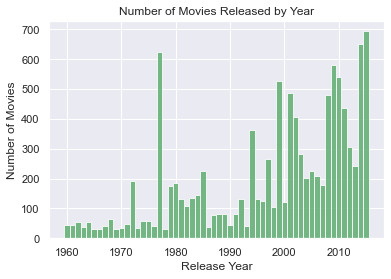

In [116]:
# Plotting bars for visualisation
sns.set_theme()   #use seaborn for beautifying plots
year = df['release_year'].unique()   # for x values
number_of_movies = df['release_year'].value_counts().values # for y values

plt.bar(year, number_of_movies, color = 'g', alpha =0.8, width = 1.)
plt.title('Number of Movies Released by Year', fontsize = 12)
plt.xlabel('Release Year', fontsize = 12)
plt.ylabel('Number of Movies', fontsize = 12)

### Investigating the Production of Directors
- This section shows the number of movies produced by some high perfoming directors

In [117]:
# Recap: did some directors produced more than 1 movie?
df['director'].value_counts()

Woody Allen                  45
Clint Eastwood               34
Steven Spielberg             29
Martin Scorsese              29
Ridley Scott                 23
                             ..
Larry Shaw                    1
Laura Poitras                 1
Damon Beesley|Iain Morris     1
Bill Pohlad                   1
Harold P. Warren              1
Name: director, Length: 5056, dtype: int64

In [118]:
# Number of directors who have 10 or more movie releases
sum(df['director'].value_counts() >= 10)

119

In [119]:
# Number of directors who have 20 or more movie releases
sum(df['director'].value_counts() >= 20)

9

### Pie Chart representation for the directors that produced 20 or more movies

In [120]:
# the cummulative number of movies produced these directors
df.director.value_counts().head(9).sum()

245

In [121]:
temp = df.director.value_counts().head(9).values
temp

array([45, 34, 29, 29, 23, 22, 22, 21, 20], dtype=int64)

In [122]:
directors = df.director.value_counts().head(9).index
directors

Index(['Woody Allen', 'Clint Eastwood', 'Steven Spielberg', 'Martin Scorsese',
       'Ridley Scott', 'Ron Howard', 'Steven Soderbergh', 'Joel Schumacher',
       'Brian De Palma'],
      dtype='object')

Use [this](https://stackoverflow.com/questions/54564641/different-colors-for-each-label-in-my-pie-chart) and [this](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html?highlight=pie%20chart) for your pie chart guidelines

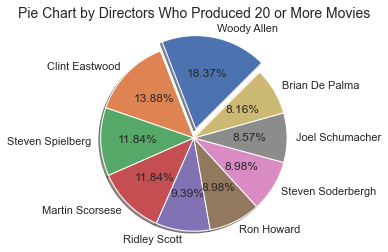

In [123]:
# Pie chart, where the slices will be ordered and plotted anti-clockwise:
labels = directors
sizes = temp
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0)  # exploding the slice with the biggest share

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=45) # using default color list
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Pie Chart by Directors Who Produced 20 or More Movies', fontsize = 14)
plt.show()

### Exploring the 'genres' produced
- This is to find out the genres producers are most intrested about 

In [124]:
df['genres'].value_counts()

Drama                                      711
Comedy                                     707
Documentary                                306
Drama|Romance                              289
Comedy|Drama                               280
                                          ... 
Action|Thriller|Science Fiction|Mystery      1
Comedy|Music|Romance|Foreign                 1
Documentary|Drama|Comedy                     1
Fantasy|Drama|Science Fiction|Family         1
Mystery|Science Fiction|Thriller|Drama       1
Name: genres, Length: 2031, dtype: int64

In [103]:
df['genres'].value_counts().describe()

count    2039.000000
mean        5.317312
std        28.515768
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       712.000000
Name: genres, dtype: float64

The distribution shows extreme gabs between the classes, so I'll consider the top most genres

In [128]:
# Get the 'genres' appearing 100 times or more
sum(df['genres'].value_counts() >= 100)

12

In [129]:
top_genres = df['genres'].value_counts().head(12).index
top_genres

Index(['Drama', 'Comedy', 'Documentary', 'Drama|Romance', 'Comedy|Drama',
       'Comedy|Romance', 'Horror|Thriller', 'Horror', 'Comedy|Drama|Romance',
       'Drama|Thriller', 'Comedy|Family', 'Action|Thriller'],
      dtype='object')

In [130]:
total_movies = df['genres'].value_counts().head(12).values
total_movies

array([711, 707, 306, 289, 280, 267, 259, 253, 222, 138, 102, 101],
      dtype=int64)

More information [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html?highlight=scatter#matplotlib.pyplot.scatter) and [here](https://stackoverflow.com/questions/37084305/rotating-xticks-in-python) 

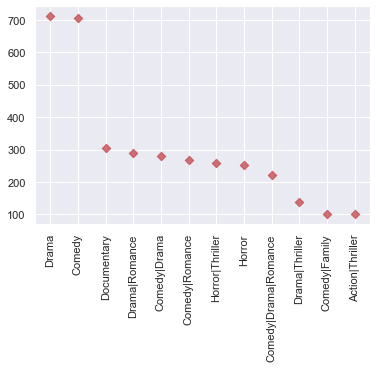

In [131]:
sns.set_theme(style='darkgrid')
plt.scatter(top_genres, total_movies, marker = 'D', color='r', alpha = 0.8);
plt.xticks(top_genres, rotation = 90);

In [132]:
df.to_csv('moviedata_03.csv', index = False)

### Research Question 2: How is the revenue generated affected by the popularity, year of release, directorship, and the budget

In [133]:
df = pd.read_csv('moviedata_03.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    10800 non-null  float64
 1   budget        10800 non-null  int64  
 2   revenue       10800 non-null  int64  
 3   director      10800 non-null  object 
 4   runtime       10800 non-null  int64  
 5   genres        10800 non-null  object 
 6   release_date  10800 non-null  object 
 7   vote_count    10800 non-null  int64  
 8   vote_average  10800 non-null  float64
 9   release_year  10800 non-null  int64  
 10  budget_adj    10800 non-null  float64
 11  revenue_adj   10800 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1012.6+ KB


### What type of correlation exists between Popularity and Revenue

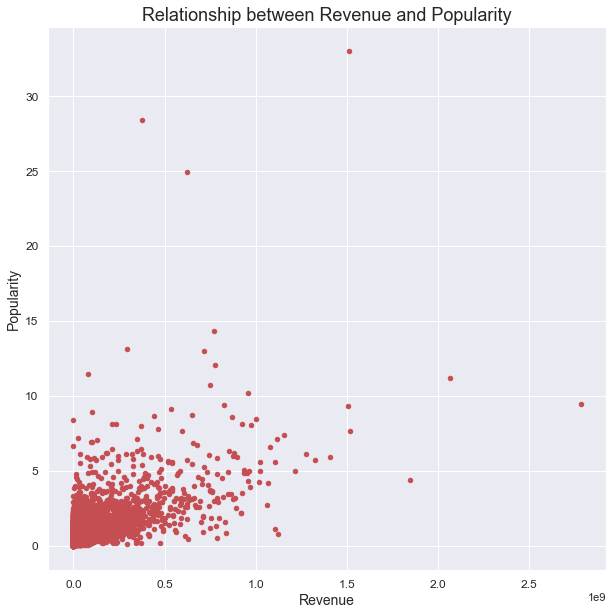

In [134]:
sns.set_theme()
df.plot(x='revenue', y='popularity', kind = 'scatter', figsize = (10,10), 
       fontsize = 12, c = 'r');
plt.xlabel('Revenue', fontsize = 14)
plt.ylabel('Popularity', fontsize = 14)
plt.title('Relationship between Revenue and Popularity', fontsize = 18);

It is a positive correlation, concentrated at the bottom

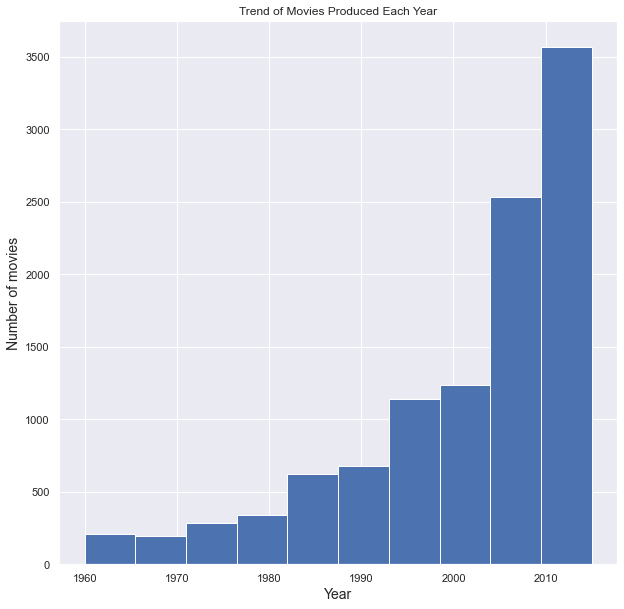

In [9]:
# a histogram to see the trend of the number of movies produced yearly
df['release_year'].plot(kind = 'hist', figsize = (10,10), grid = 'on');
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Number of movies', fontsize = 14)
plt.title('Trend of Movies Produced Each Year');

The number of movies produced increses every decade after 1970

In [135]:
df['release_year'] = df['release_year'].astype('str')

### How are the revenue and budget each year 

In [141]:
temp = df.groupby(['release_year'], as_index = False)[['revenue', 'budget']].sum()
temp

,release_year,revenue,budget
0,1960,145005000,22056948
1,1961,337720188,46137000
2,1962,215579846,54722126
3,1963,187404989,73331500
4,1964,340981782,39483161
5,1965,458081854,70205115
6,1966,84736689,57554800
7,1967,737834637,100652200
8,1968,264732980,71939000
9,1969,243957076,42129087


In [143]:
temp.describe()

,revenue,budget
count,5.600000e+01,5.600000e+01
mean,7.726933e+09,2.837148e+09
std,8.331862e+09,3.300471e+09
min,8.473669e+07,2.205695e+07
25%,8.096563e+08,9.473165e+07
50%,3.600828e+09,8.370343e+08
75%,1.371847e+10,5.797586e+09
max,2.676245e+10,9.355001e+09


This results show that revenue is generally higher than expenditure/budget

In [137]:
# year with maximum revenue
temp.max()

release_year           2015
revenue         26762450518
budget           9355001006
dtype: object

In [138]:
# year with min revenue
temp.min()

release_year        1960
revenue         84736689
budget          22056948
dtype: object

### How many directors made more the 75th percentile or more of the total revenue

In [31]:
director_revenue = df.groupby(['director'], as_index = False)[['revenue', 'budget']].sum()
director_revenue.describe()

,revenue,budget
count,5.056000e+03,5.056000e+03
mean,8.558311e+07,3.142411e+07
std,3.517405e+08,1.013858e+08
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,1.942224e+07,1.560000e+07
max,9.018564e+09,1.589950e+09


In [32]:
# the number that made 75th percentile or more of the total revenue
sum(df.groupby('director').sum().revenue >= 1.942224e+07)

1264

In [139]:
# The director with the biggest revenue
director_revenue.max()

director    Ã€lex Pastor|David Pastor
revenue                    9018563772
budget                     1589950000
dtype: object

<a id='conclusions'></a>
## Conclusion
1. The number of movies produced each varies from one year to another with no unique partern as observed from the bar graph, but the decade movie production increases successively after the second decade as seen in the histogram

2. A total of 119 directors out of the 5000+ directors produced more 10 or more movies, while only 9 directors succeeded in producing 20 or more movies

3. The 9 directors produced a total of 245 movies out of which Woody Allen made 18.37% (45), the highest amoung the producers. This is shown the exploded pie chart

4. The genre preferation shows that the top 5 common genres were Drama, Comedy, Documentary, Drama|Romance and Comedy|Romance. They had the following appearances: 711, 707, 312, 289, and 280. Visualisation is shown in a scatter diagram

5. There was a positive correlation between popularity and revenue, showing that populous movies generated more revenue, generally

6. A study of the revenue and budget indicated that the movie industry is generally profitable, the revenue is always greater than the budget. The year 2015 had the largest revenue while 1960 had the smallest.

7. The directorship with the largest revenue was Aelex Pastor|David Pastor